In [2]:
import cv2
import numpy as np
print(cv2.__version__)
print(cv2.cuda.getCudaEnabledDeviceCount())

def stereoBM_gpu(left_image_path, right_image_path, num_disparities=64, block_size=21):
    # Load stereo images in grayscale
    img_left = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
    img_right = cv2.imread(right_image_path, cv2.IMREAD_GRAYSCALE)

    if img_left is None or img_right is None:
        raise ValueError("Images not found. Check the file paths.")

    # Ensure the OpenCV CUDA module is available
    # if not cv2.cuda.getCudaEnabledDeviceCount():
    #     raise RuntimeError("CUDA-enabled GPU not detected!")

    # Upload images to the GPU
    gpu_img_left = cv2.cuda_GpuMat()
    gpu_img_right = cv2.cuda_GpuMat()
    gpu_img_left.upload(img_left)
    gpu_img_right.upload(img_right)

    # Create GPU StereoBM object
    stereo = cv2.cuda.createStereoBM(numDisparities=num_disparities, blockSize=block_size)

    # Compute disparity on GPU
    disparity_gpu = stereo.compute(gpu_img_left, gpu_img_right)

    # Download disparity map from GPU to CPU
    disparity = disparity_gpu.download()

    # Normalize disparity for visualization
    disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    disparity_normalized = np.uint8(disparity_normalized)

    # Display the disparity map
    cv2.imshow("Disparity Map", disparity_normalized)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    return disparity

# Example usage
dataset_dir = "../dataset/"
# Time meas
# Time measurement
import time
start = time.time()
disparity_map = stereoBM_gpu(f"{dataset_dir}chess1_r.jpg", f"{dataset_dir}chess2_r.jpg")
end = time.time()

print(f"Disparity map computed in {end - start:.2f} seconds.")



4.10.0
0


error: OpenCV(4.10.0) /io/opencv/modules/core/include/opencv2/core/private.cuda.hpp:106: error: (-216:No CUDA support) The library is compiled without CUDA support in function 'throw_no_cuda'


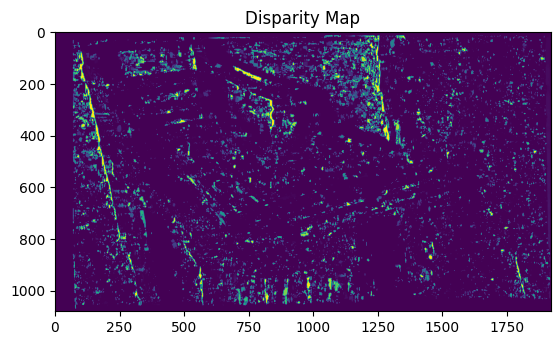

Disparity map computed in 0.14 seconds.


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stereoBM_cpu(left_image_path, right_image_path, num_disparities=64, block_size=15):
    """
    Compute disparity map using StereoBM on the CPU.

    Parameters:
        left_image_path (str): Path to the left image.
        right_image_path (str): Path to the right image.
        num_disparities (int): Number of disparities (must be divisible by 16).
        block_size (int): Block size for matching (must be an odd number >= 5).

    Returns:
        disparity_map (numpy.ndarray): The computed disparity map.
    """
    # Load stereo images in grayscale
    img_left = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
    img_right = cv2.imread(right_image_path, cv2.IMREAD_GRAYSCALE)

    if img_left is None or img_right is None:
        raise ValueError("One or both images not found. Check the file paths.")

    # Create StereoBM object
    stereo = cv2.StereoBM_create(numDisparities=num_disparities, blockSize=block_size)

    # Compute the disparity map
    disparity = stereo.compute(img_left, img_right)

    # Normalize the disparity map for visualization
    disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    disparity_normalized = np.uint8(disparity_normalized)

    return disparity_normalized

# Example usage
import time
start = time.time()
dataset_dir = ""
disparity_map = stereoBM_cpu(f"{dataset_dir}chess1.jpg", f"{dataset_dir}chess2.jpg")
end = time.time()


# Display the disparity map
plt.imshow(disparity_map)#, cmap='gray')
plt.title("Disparity Map")
plt.show()
print(f"Disparity map computed in {end - start:.2f} seconds.")


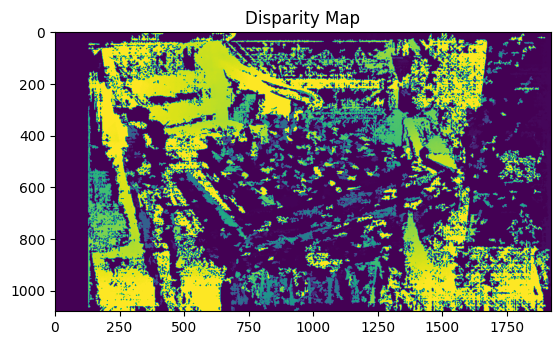

Disparity map computed in 1.28 seconds.


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def stereoSGBM_cpu(left_image_path, right_image_path, num_disparities=128, block_size=5):
    """
    Compute disparity map using StereoSGBM on the CPU.

    Parameters:
        left_image_path (str): Path to the left image.
        right_image_path (str): Path to the right image.
        num_disparities (int): Number of disparities (must be divisible by 16).
        block_size (int): Block size for matching (must be odd).

    Returns:
        disparity_map (numpy.ndarray): The computed disparity map.
    """
    # Load stereo images in grayscale
    img_left = cv2.imread(left_image_path, cv2.IMREAD_GRAYSCALE)
    img_right = cv2.imread(right_image_path, cv2.IMREAD_GRAYSCALE)

    if img_left is None or img_right is None:
        raise ValueError("One or both images not found. Check the file paths.")

    # Create StereoSGBM object
    stereo = cv2.StereoSGBM_create(
        minDisparity=0,
        numDisparities=num_disparities,  # Must be divisible by 16
        blockSize=block_size,  # Must be odd
        P1=8 * 3 * block_size**2,  # Penalty for disparity changes
        P2=32 * 3 * block_size**2,
        disp12MaxDiff=1,
        uniquenessRatio=10,
        speckleWindowSize=100,
        speckleRange=32,
        preFilterCap=63
    )

    # Compute the disparity map
    disparity = stereo.compute(img_left, img_right)

    # Normalize the disparity map for visualization
    disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    disparity_normalized = np.uint8(disparity_normalized)

    return disparity_normalized

# Example usage
import time
start = time.time()
dataset_dir = ""
disparity_map = stereoSGBM_cpu(f"{dataset_dir}chess1.jpg", f"{dataset_dir}chess2.jpg")
end = time.time()


# Display the disparity map
plt.imshow(disparity_map)#, cmap='gray')
plt.title("Disparity Map")
plt.show()
print(f"Disparity map computed in {end - start:.2f} seconds.")
